# Dados Qualitativos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import *
import numpy as np

#from statsmodels.formula.api import *

from nltk.probability import FreqDist

#iris = pd.read_csv('iris.csv')
iris = pd.read_csv('reclamacoes_2018-03.csv',sep=';',encoding='latin1') # Setando o delimitador e a linguagem

iris.head(4)# Mostrar apenas a quantidade de linhas informadas (Quando informado)


,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Jacareí,M,entre 21 a 30 anos,16/03/2018,8.0,Mercado Livre,Comércio Eletrônico,Produtos de Telefonia e Informática,"Acessórios e periféricos (monitor, impressora,...",Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Resolvida,5.0,1
1,CO,DF,Brasília,M,entre 21 a 30 anos,16/03/2018,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada avaliada,Resolvida,4.0,1
2,SE,SP,São Paulo,F,entre 61 a 70 anos,21/03/2018,2.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,1
3,SE,MG,Juatuba,M,entre 21 a 30 anos,19/03/2018,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Resolvida,5.0,1


## Lista completa ordenada pela ocorrencia dos dados

In [16]:
from collections import Counter

lista = iris['Área']
print(lista)
#print(Counter(lista).most_common(len(lista)))

0            Produtos de Telefonia e Informática
1                               Telecomunicações
2                               Telecomunicações
3                           Serviços Financeiros
4                               Telecomunicações
5                               Telecomunicações
6                               Telecomunicações
7                           Serviços Financeiros
8                               Telecomunicações
9                               Telecomunicações
10                              Demais Serviços 
11                              Telecomunicações
12           Produtos de Telefonia e Informática
13                          Serviços Financeiros
14                          Serviços Financeiros
15                          Serviços Financeiros
16                                   Transportes
17                                   Transportes
18                          Serviços Financeiros
19                              Telecomunicações
20                  

In [17]:
iris.columns # Retorna o nome das colunas

Index(['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Total'],
      dtype='object')

# Tipos de amostra

## Amostragem Inteiramente Aleatória

In [17]:
import random

aleatoria = []
QUANTIDADE = 200
TAMANHO_LISTA = len(lista)

numeros_aleatorios = random.sample(range(1,TAMANHO_LISTA), QUANTIDADE)

for i in numeros_aleatorios:
    aleatoria.append(lista[i])

print(aleatoria)
#print(Counter(amostragem).most_common(len(amostragem))) # Retorna os termos mais frequentes

['Serviços Financeiros', 'Serviços Financeiros', 'Serviços Financeiros', 'Serviços Financeiros', 'Telecomunicações', 'Serviços Financeiros', 'Demais Produtos', 'Transportes', 'Serviços Financeiros', 'Serviços Financeiros', 'Transportes', 'Serviços Financeiros', 'Telecomunicações', 'Produtos Eletrodomésticos e Eletrônicos', 'Telecomunicações', 'Demais Produtos', 'Serviços Financeiros', 'Telecomunicações', 'Turismo/Viagens', 'Telecomunicações', 'Serviços Financeiros', 'Serviços Financeiros', 'Serviços Financeiros', 'Serviços Financeiros', 'Serviços Financeiros', 'Telecomunicações', 'Telecomunicações', 'Serviços Financeiros', 'Demais Produtos', 'Transportes', 'Telecomunicações', 'Telecomunicações', 'Demais Produtos', 'Serviços Financeiros', 'Telecomunicações', 'Telecomunicações', 'Serviços Financeiros', 'Telecomunicações', 'Telecomunicações', 'Serviços Financeiros', 'Telecomunicações', 'Telecomunicações', 'Telecomunicações', 'Serviços Financeiros', 'Serviços Financeiros', 'Serviços Financ

## Amostragem Sistematica

In [4]:
import random

sistematica = []
QNT_AMOSTRA = 10

# Sorteando o ponto de partida da amostragem de acordo com a quantidade de amostra desejada
inicio_aleatorio = random.randint(1, QNT_AMOSTRA)

sistematica = lista[inicio_aleatorio::QNT_AMOSTRA]
print(sistematica)
    #sistematica.append(lista[0::QNT_AMOSTRA])

#print(sistematica)

9                               Telecomunicações
19                              Telecomunicações
29                          Serviços Financeiros
39                              Telecomunicações
49                              Telecomunicações
59                              Telecomunicações
69                              Telecomunicações
79                               Demais Produtos
89                              Demais Serviços 
99                                   Transportes
109                              Demais Produtos
119                         Serviços Financeiros
129                             Telecomunicações
139                             Telecomunicações
149                             Telecomunicações
159                             Telecomunicações
169                             Telecomunicações
179                                  Transportes
189                             Telecomunicações
199                         Serviços Financeiros
209          Produto

## Amostragem Estratificado

## Tabelas

In [18]:
from collections import Counter
celulares = pd.read_csv('celulares.csv',sep=';',encoding='latin1')

#lista = celulares['Marca']
#lista = celulares['Marca'].value_counts()
#lista

tabela_frequencia = Counter(aleatoria).most_common(len(aleatoria))
df = pd.DataFrame(tabela_frequencia, columns=['Marca','Quantidade'])
df.to_csv('tabela_frequencia_celulares.csv')
df


,Marca,Quantidade
0,Serviços Financeiros,82
1,Telecomunicações,68
2,Produtos de Telefonia e Informática,15
3,Produtos Eletrodomésticos e Eletrônicos,11
4,Transportes,8
5,Demais Produtos,7
6,Demais Serviços,4
7,Turismo/Viagens,2
8,"Água, Energia, Gás",2
9,Saúde,1


## Gráficos

### Gráfico de Coluna

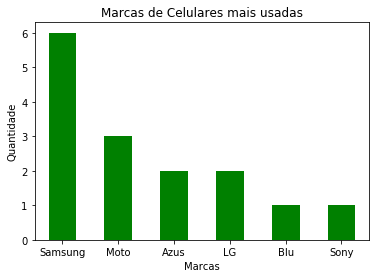

In [19]:
lista = celulares['Marca'].value_counts().plot(kind='bar',figsize=(6,4), grid = False, rot = 0, color='green')
plt.title('Marcas de Celulares mais usadas')
plt.xlabel('Marcas')
plt.ylabel('Quantidade')
plt.show()

### Gráfico de Barra

<IPython.core.display.Javascript object>


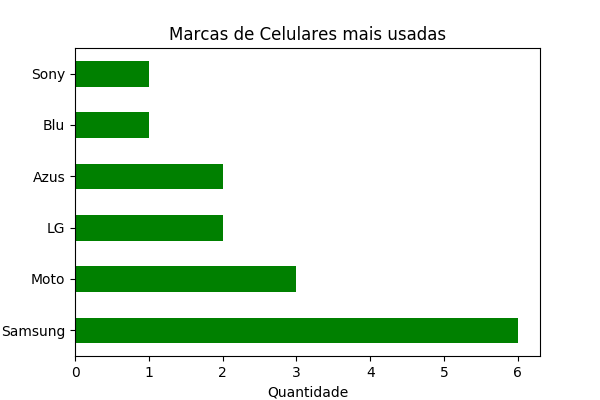

In [103]:
lista = celulares['Marca'].value_counts().plot(kind='barh',figsize=(6,4), grid = False, rot = 0, color='green')
plt.title('Marcas de Celulares mais usadas')
plt.xlabel('Quantidade')
plt.ylabel('Marcas')
plt.show()

### Gráfico de Pizza

<IPython.core.display.Javascript object>


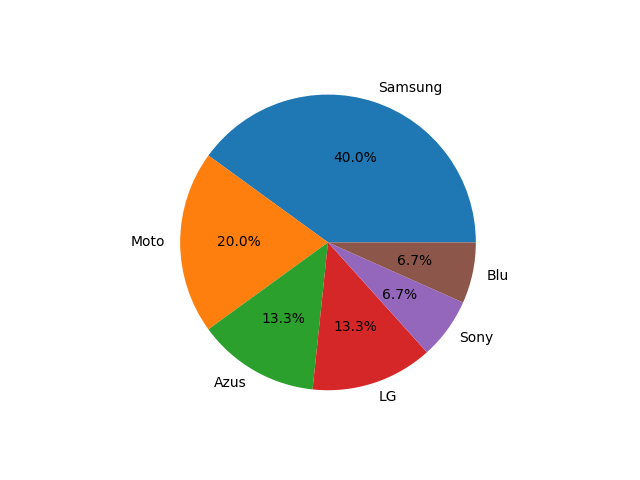

In [108]:
labels = df['Marca']
fracs = df['Quantidade']

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%')
#plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show()